# Compare 3 methods to get W, mu, sigma2

## Imports

In [2]:
from ppca import PPCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,load_breast_cancer,load_wine
from sklearn.decomposition import PCA

## Datasets

In [3]:
# Loading data

# data = load_iris()
data = load_breast_cancer()
# data = load_wine()

X, y = data['data'], data['target']

In [11]:
# PPCA parameters
n_components = 3
epochs = 10000

In [12]:
# PPCA
Xts = []
for method in ['svd', 'em', 'sgd']:
    print(f"Running PPCA with method: {method}")
    pca = PPCA(n_components=n_components, method=method, max_iter=epochs)
    Xt = pca.fit_transform(X)
    Xts.append(Xt)

Running PPCA with method: svd
PPCA initialized with n_components=3, method=svd
Running PPCA with method: em
PPCA initialized with n_components=3, method=em
Starting EM fitting on 10000 epochs...


EM: 100%|██████████| 10000/10000 [00:06<00:00, 1594.75iter/s, W_change=0.0125]


Running PPCA with method: sgd
PPCA initialized with n_components=3, method=sgd
Starting SGD fitting on 10000 epochs...


SGD: 100%|██████████| 10000/10000 [00:08<00:00, 1155.21iter/s, loss=7.06e+4]


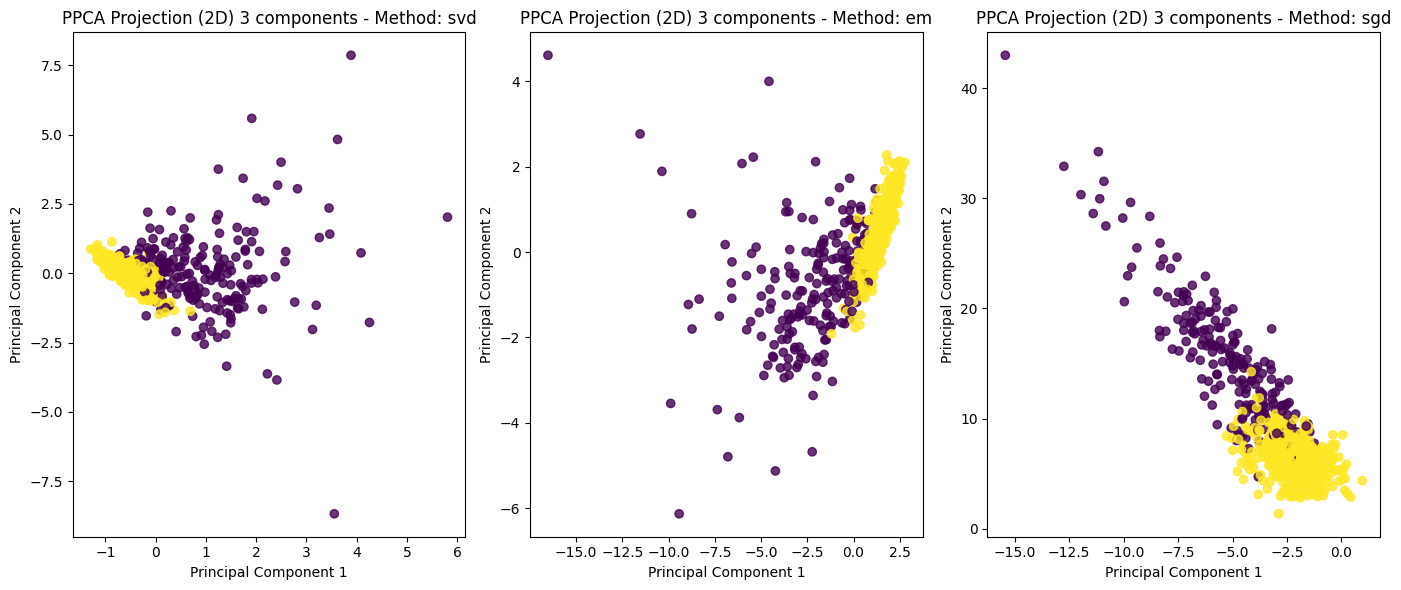

In [13]:
# Grouped plots in one figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

for i, method in enumerate(['svd', 'em', 'sgd']):
    Xt = Xts[i]
    scatter = axs[i].scatter(Xt[:, 0], Xt[:, 1], c=y, cmap='viridis', alpha=0.8)
    axs[i].set_title(f'PPCA Projection (2D) {n_components} components - Method: {method}')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    
plt.tight_layout()
plt.show()